# 26 Sep 23 - Graphing Electric Fields

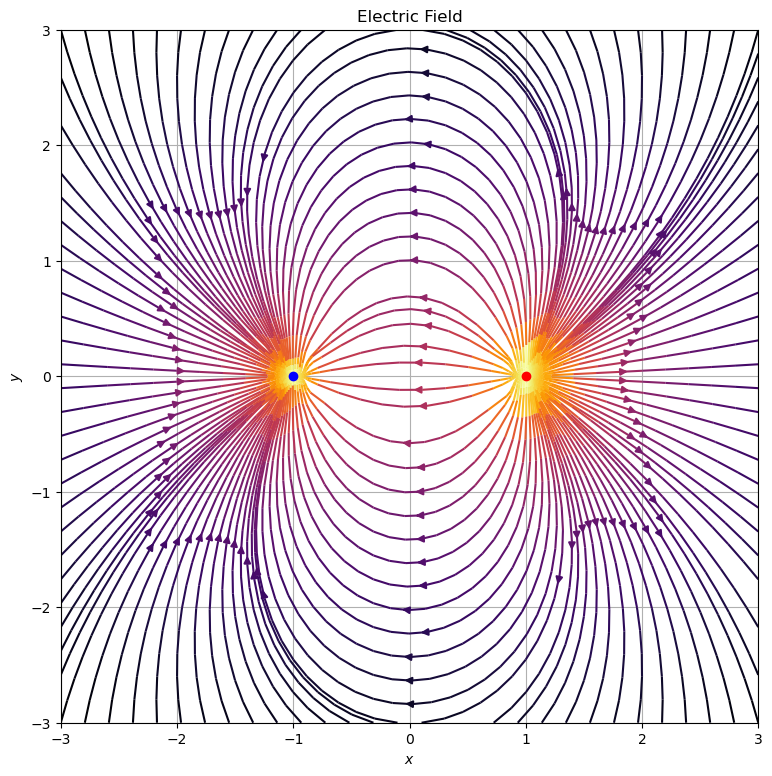

In [63]:
import numpy as np
import matplotlib.pyplot as plt

class pointcharge:
    # CLASS for pointcharge
    def __init__(self,q,r):
        self.q = q # charge in coulombs
        self.r = r # location
        if self.q > 0.: # automatically assign color based on sign of charge
            self.c = "r"
        else:
            self.c = "b"

## Get charges using OOP
q = 1e-5 # basic charge in coulombs to use
k = 9e9  # coulomb constant
Q = pointcharge(q,np.array([1.,0.]))
Q2 = pointcharge(-q,np.array([-1.,0.]))
charges = [Q,Q2]

def E(x, y,charge):
    # calculate E field from a point charge at x,y
    r_obs = np.array([x,y])
    r_sep = r_obs - charge.r
    E = k * charge.q * r_sep / np.linalg.norm(r_sep)**3
    return E

def point_charge_E(X, Y,charges):
    # makes E vector field
    E_x, E_y = np.zeros(X.shape), np.zeros(Y.shape)
    Xlim, Ylim = X.shape
    for charge in charges:
        for i in range(Xlim):
            for j in range(Ylim):
                xloc = X[i, j]
                yloc = Y[i, j]
                Field = E(xloc, yloc,charge)
                E_x[i,j] += Field[0]
                E_y[i,j] += Field[1]
    return E_x, E_y

# Plotting
N = 40
x = np.linspace(-3., 3., N)
v = np.linspace(-3., 3., N)
X, V = np.meshgrid(x, v)
E_x, E_y = point_charge_E(X, V,charges)
ax = plt.figure(figsize=(9,9))
color = np.log(np.hypot(E_x, E_y)) # Taking a log when getting colors because otherwise it drops off way fast
streamplot = plt.streamplot(X, V, E_x, E_y,   # do plotting
                            color=color, cmap=plt.cm.inferno, 
                            broken_streamlines=False) # change to true for different style
for charge in charges: # plot the charges too
    plt.scatter(charge.r[0],charge.r[1],c = charge.c, zorder= 2)
plt.grid()
plt.title('Electric Field')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()